In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
dataset = pd.read_csv('collegePlace.csv')
dataset.head().style.background_gradient(axis=0)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [8]:
dataset.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [11]:
dataset.describe().style.background_gradient(axis=0)

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [12]:
dataset['Internships'].unique()

array([1, 0, 2, 3], dtype=int64)

In [13]:
dataset['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [14]:
dataset['Hostel'].unique()

array([1, 0], dtype=int64)

In [15]:
dataset['HistoryOfBacklogs'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='PlacedOrNot', ylabel='count'>

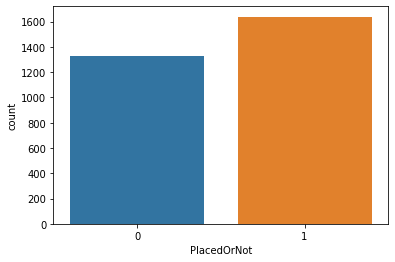

In [16]:
sns.countplot(data = dataset , x = 'PlacedOrNot')

<AxesSubplot:xlabel='Age', ylabel='CGPA'>

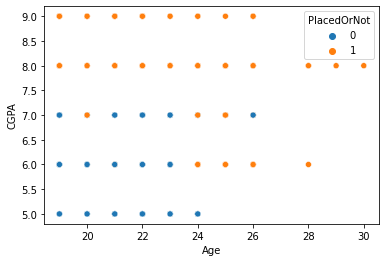

In [17]:
sns.scatterplot(data = dataset, x='Age' , y ='CGPA' , hue='PlacedOrNot')

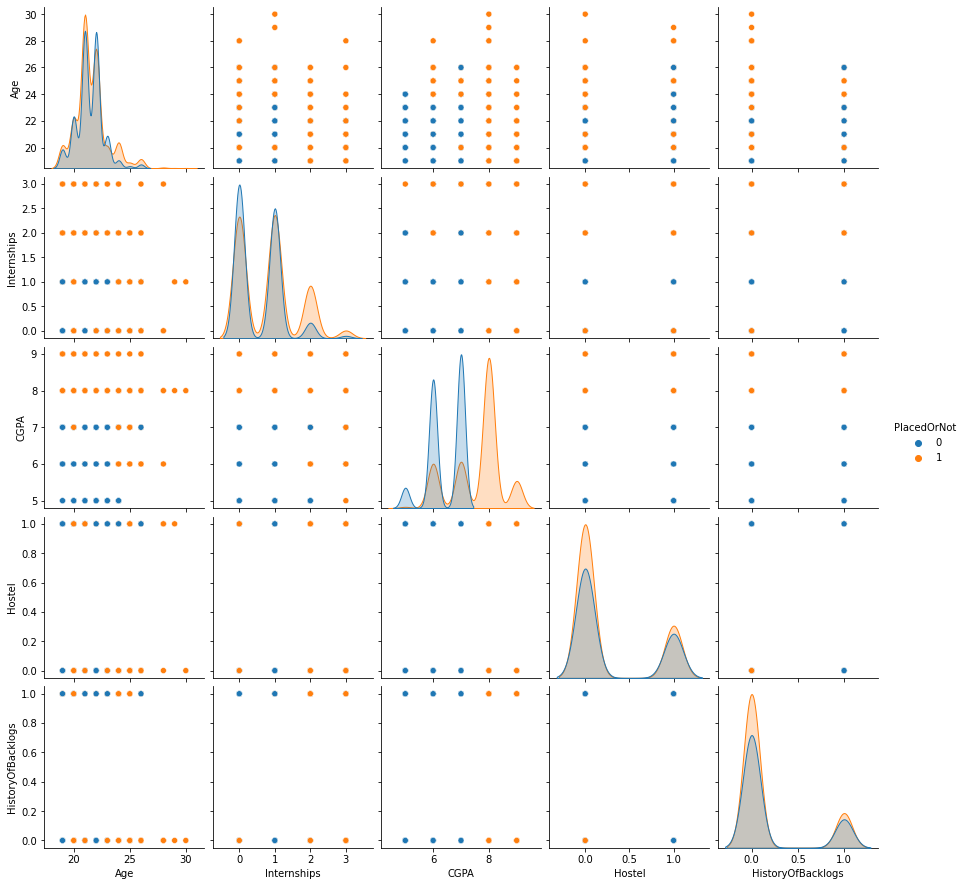

In [18]:
sns.pairplot(data = dataset , hue = 'PlacedOrNot')

In [42]:
# Now we are going to divide the data to x and y : 
x = pd.get_dummies(dataset.drop('PlacedOrNot',axis=1),drop_first= True,prefix='Dummy',prefix_sep = '*')
y = dataset['PlacedOrNot']

In [43]:
# Train test split 
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [45]:
# Now we are going to scale the data : 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

LogisticRegression Algorithm 

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.metrics import classification_report , plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve , accuracy_score

In [46]:
log_model = LogisticRegression()
log_model.fit(scaled_x_train,Y_train)

LogisticRegression()

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=log_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[280 119]
 [113 378]]


0.7393258426966293

In [27]:
def Metrics_functions (model):
    y_pred = model.predict(scaled_x_test)
    print(classification_report(Y_test,y_pred))
    accuracy_score(Y_test , y_pred)
    plot_confusion_matrix(model , scaled_x_test , Y_test)
    plot_roc_curve(model , scaled_x_test , Y_test)
    plot_precision_recall_curve(model , scaled_x_test , Y_test)

              precision    recall  f1-score   support

           0       0.71      0.70      0.71       399
           1       0.76      0.77      0.77       491

    accuracy                           0.74       890
   macro avg       0.74      0.74      0.74       890
weighted avg       0.74      0.74      0.74       890



C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

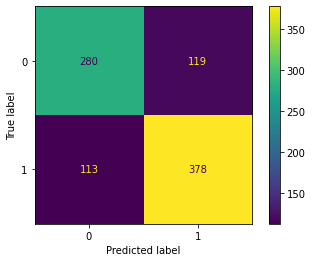

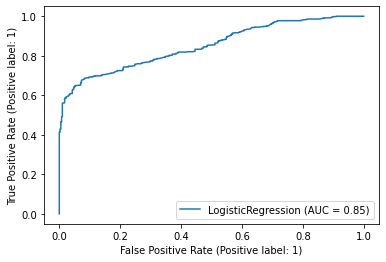

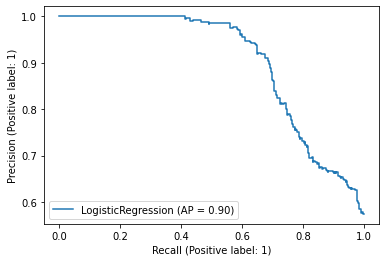

In [28]:
Metrics_functions(log_model)

***KNN_Algorithm******

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
# Now we will make for loop to get the best K value : 
test_error_rate = []

for k in range (1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_x_train,Y_train)
    y_pred = knn_model.predict(scaled_x_test)
    error_rate = 1-accuracy_score(Y_test,y_pred)
    test_error_rate.append(error_rate)

Text(0.5, 1.0, 'Choose the best K value')

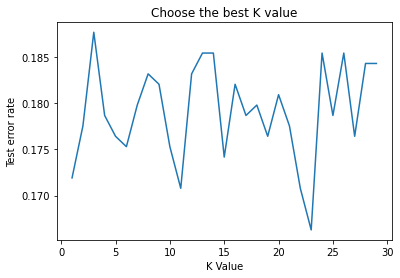

In [49]:
plt.plot(range(1,30),test_error_rate)
plt.xlabel('K Value')
plt.ylabel('Test error rate')
plt.title('Choose the best K value')

In [50]:
knn_model = KNeighborsClassifier(n_neighbors= 23)

In [51]:
knn_model = knn_model.fit(scaled_x_train,y_train)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       399
           1       0.89      0.79      0.84       491

    accuracy                           0.83       890
   macro avg       0.84      0.84      0.83       890
weighted avg       0.84      0.83      0.83       890



C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

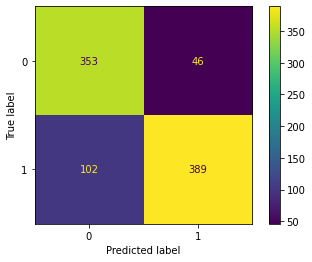

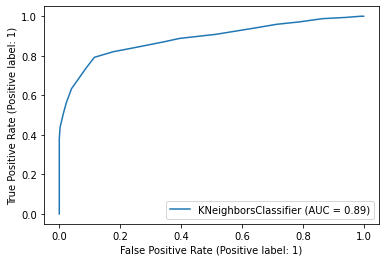

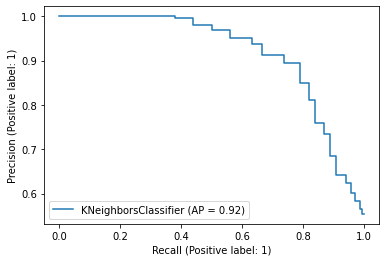

In [52]:
Metrics_functions(knn_model)

In [74]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=knn_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[353  46]
 [102 389]]


0.8337078651685393

**SVM ALGORITHM **

In [57]:
from sklearn.svm import SVC

In [58]:
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,1]}
from sklearn.model_selection import GridSearchCV

In [59]:
grid_model = GridSearchCV(svc,param_grid)

In [60]:
grid_model.fit(scaled_x_train,Y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 1]})

In [61]:
grid_model.best_params_

{'C': 1}

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       399
           1       0.92      0.80      0.86       491

    accuracy                           0.85       890
   macro avg       0.86      0.86      0.85       890
weighted avg       0.86      0.85      0.85       890



C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

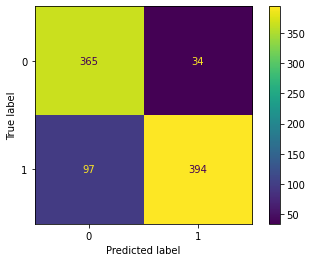

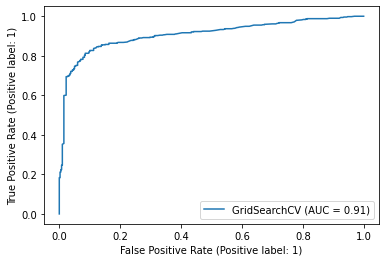

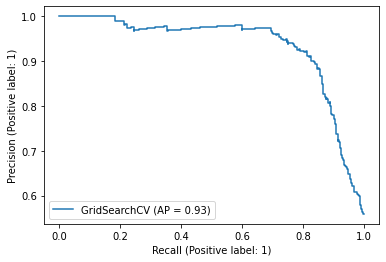

In [62]:
Metrics_functions(grid_model)

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=grid_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[365  34]
 [ 97 394]]


0.852808988764045

**Decision Tree**

In [66]:
    from sklearn.tree import DecisionTreeClassifier

In [67]:
tree_model = DecisionTreeClassifier()

In [68]:
tree_model.fit(scaled_x_train,Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.82      0.95      0.88       399
           1       0.96      0.83      0.89       491

    accuracy                           0.89       890
   macro avg       0.89      0.89      0.89       890
weighted avg       0.90      0.89      0.89       890



C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\muham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is dep

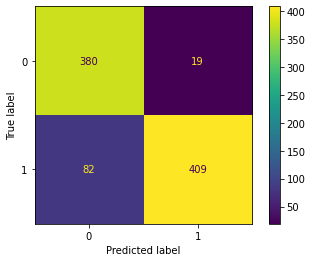

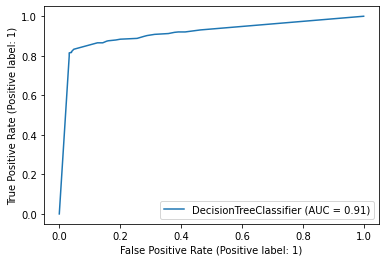

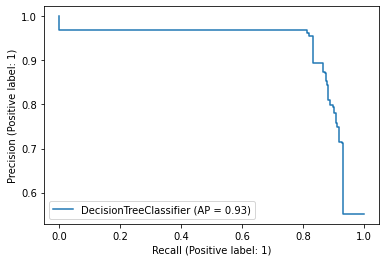

In [69]:
Metrics_functions(tree_model)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=tree_model.predict(scaled_x_test)
cm=confusion_matrix(Y_test,y_pred)
print(cm)
accuracy_score(Y_test,y_pred)

[[380  19]
 [ 82 409]]


0.8865168539325843

In [41]:
tree_model.feature_importances_

array([0.1377458 , 0.08639514, 0.64705215, 0.01932932, 0.02935063,
       0.01366195, 0.00993504, 0.02098701, 0.01278811, 0.01479683,
       0.00795805])

In [42]:
X.columns

Index(['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs',
       'Dummy*Male', 'Dummy*Computer Science', 'Dummy*Electrical',
       'Dummy*Electronics And Communication', 'Dummy*Information Technology',
       'Dummy*Mechanical'],
      dtype='object')

In [43]:
pd.DataFrame(index=X.columns,data = tree_model.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance')

,Feature Importance
Dummy*Mechanical,0.007958
Dummy*Computer Science,0.009935
Dummy*Electronics And Communication,0.012788
Dummy*Male,0.013662
Dummy*Information Technology,0.014797
Hostel,0.019329
Dummy*Electrical,0.020987
HistoryOfBacklogs,0.029351
Internships,0.086395
Age,0.137746


In [44]:
 from sklearn.tree import plot_tree

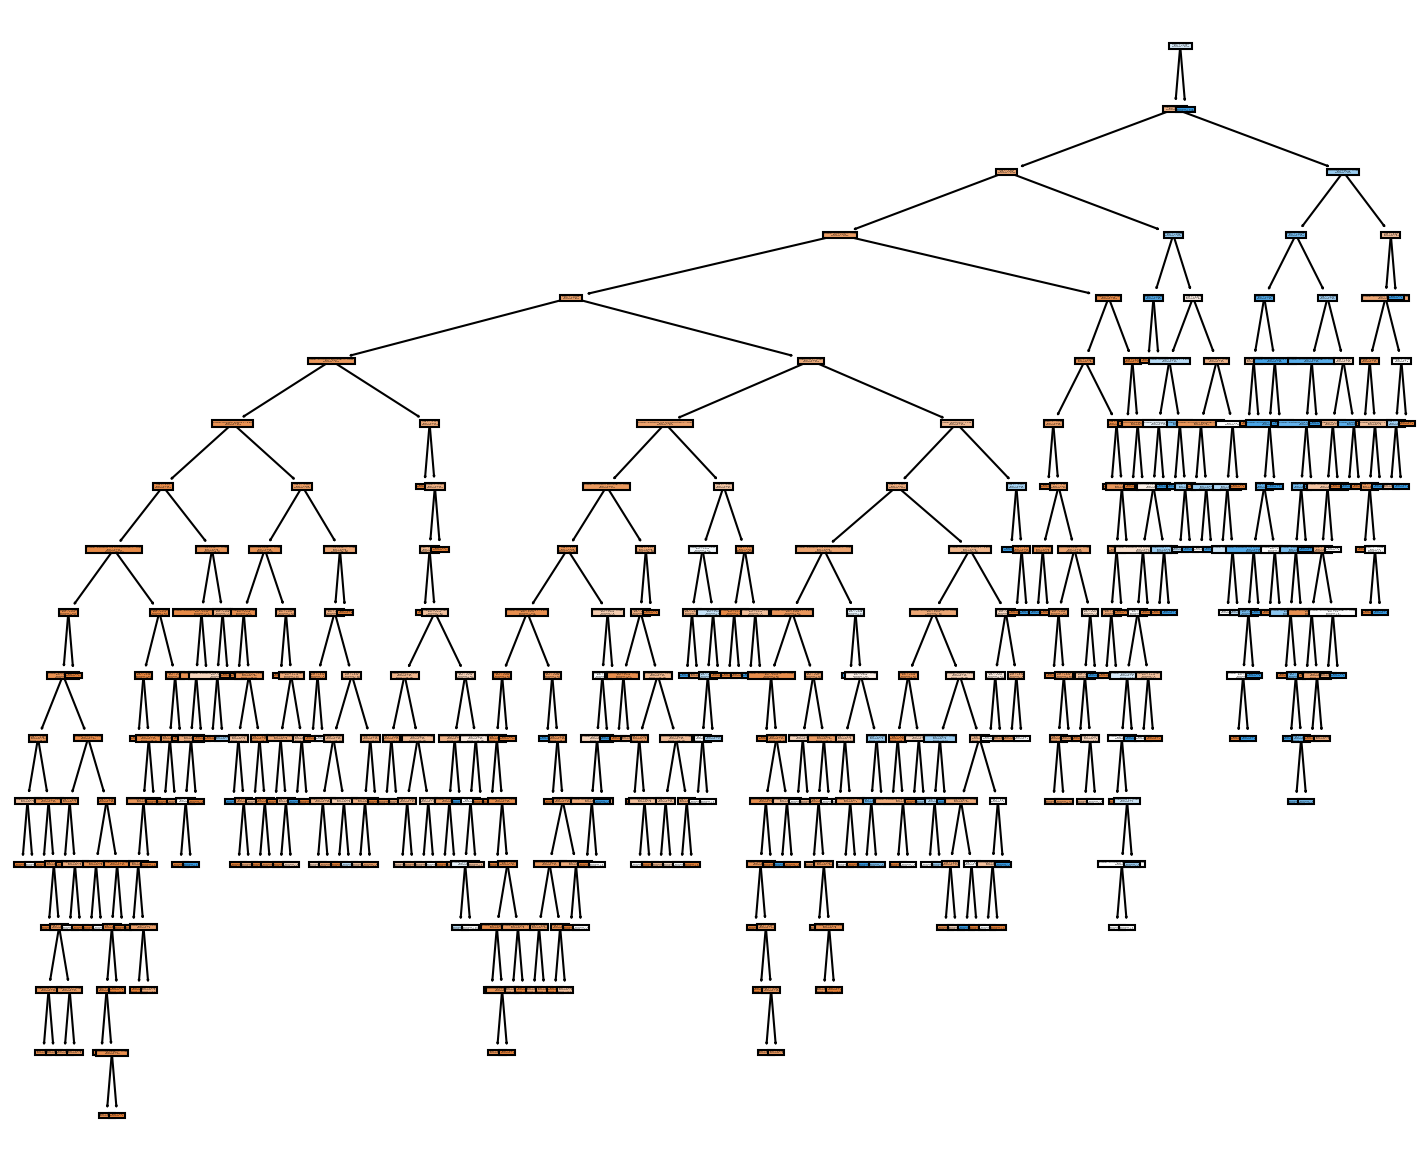

In [45]:
plt.figure(figsize=(12,10),dpi=150)
plot_tree(tree_model,feature_names=X.columns,filled=True);